In [ ]:
# check if this instance of the notebook already has files present
# and thus determine which steps required prior to reading in file and handling the data
!ls

sample_data


In [ ]:
# set-up spark (NB if Apache amend versions on download site we will need to amend path in wget command)
## NOTE that this version would make use of Hadoop if installed BUT that HDFS & Hadoop is not installed on our Colab
## (we are only using a single node (probably as a VM) so we will not be able to benefit from parallelism)
!clear
!echo welcome

!rm -f spark-3.3.[01]-bin-hadoop3.tgz* 
!rm -rf spark-3.3.[01]-bin-hadoop3

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
!tar -xf spark-3.3.2-bin-hadoop3.tgz

!ls -alt
print("standalone Spark is now installed")

welcome
--2023-05-25 00:38:01--  https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 135.181.214.104, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299360284 (285M) [application/x-gzip]
Saving to: ‘spark-3.3.2-bin-hadoop3.tgz’

spark-3.3.2-bin-had 100%[===================>] 285.49M  19.7MB/s    in 15s     

2023-05-25 00:38:18 (18.4 MB/s) - ‘spark-3.3.2-bin-hadoop3.tgz’ saved [299360284/299360284]

total 292372
drwxr-xr-x  1 root root      4096 May 25 00:38 .
drwxr-xr-x  1 root root      4096 May 25 00:21 ..
drwxr-xr-x  1 root root      4096 May 23 13:31 sample_data
drwxr-xr-x  4 root root      4096 May 23 13:30 .config
-rw-r--r--  1 root root 299360284 Feb 10 21:28 spark-3.3.2-bin-hadoop3.tgz
drwxr-xr-x 13  501 1000      4096 Feb 10 20:40 spark-3.3.2-bin-hadoop3
standalo

In [ ]:
!pip3 install findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"
import findspark
findspark.init()
from pyspark import SparkConf, SparkContext
# the next line gives us 'local' mode. try 'local[2]' to use 2 cores or 'master:NNNN' to run on Spark standalone cluster at port NNNN
spark_conf = SparkConf().setMaster('local[2]').setAppName('MyApp')
sc = SparkContext(conf=spark_conf)
# see what we have by examining the Spark User Interface
from pyspark.sql import *
from pyspark.sql.functions import *
SparkSession.builder.getOrCreate()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#init spark (ensure SPARK_HOME set to same version as we download)
import os


# use 'spark' as reference (as per standard approach)
spark = SparkSession.builder.appName("bikes").getOrCreate()

In [ ]:
# get bike hire file for given year from TfL open data
!wget https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
!unzip cyclehireusagestats-2014.zip

--2023-05-25 00:38:38--  https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
Resolving cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)... 104.16.101.13, 104.16.100.13
Connecting to cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)|104.16.101.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225215129 (215M) [application/zip]
Saving to: ‘cyclehireusagestats-2014.zip’

cyclehireusagestats 100%[===================>] 214.78M  27.9MB/s    in 9.9s    

2023-05-25 00:38:49 (21.7 MB/s) - ‘cyclehireusagestats-2014.zip’ saved [225215129/225215129]

Archive:  cyclehireusagestats-2014.zip
  inflating: 1. Journey Data Extract 05Jan14-02Feb14.csv  
  inflating: 10a. Journey Data Extract 14Sep14-27Sep14.csv  
  inflating: 10b. Journey Data Extract 28Sep14-11Oct14.csv  
  inflating: 11a. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 11b. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 12a. Journey Data Extract 09Nov14-06Dec14.csv  
  

In [ ]:
#read a file into a DF called "cycle_df"
!ls
file="./1. Journey*csv"
spark = SparkSession.builder.appName("bikes").getOrCreate()
cycle_df = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load(file))

'10a. Journey Data Extract 14Sep14-27Sep14.csv'
'10b. Journey Data Extract 28Sep14-11Oct14.csv'
'11a. Journey Data Extract 12Oct14-08Nov14.csv'
'11b. Journey Data Extract 12Oct14-08Nov14.csv'
'12a. Journey Data Extract 09Nov14-06Dec14.csv'
'12b. Journey Data Extract 09Nov14-06Dec14.csv'
'13a. Journey Data Extract 07Dec14-21Dec14.csv'
'13b. Journey Data Extract 22Dec14-03Jan15.csv'
'14. Journey Data Extract 08Dec13-04Jan14.csv'
'1. Journey Data Extract 05Jan14-02Feb14.csv'
'2. Journey Data Extract 03Feb14-01Mar14.csv'
'3. Journey Data Extract 02Mar14-31Mar14.csv'
'4. Journey Data Extract 01Apr14-26Apr14.csv'
'5. Journey Data Extract 27Apr14-24May14.csv'
'6. Journey Data Extract 25May14-21Jun14.csv'
'7. Journey Data Extract 22Jun14-19Jul14.csv'
'8a Journey Data Extract 20Jul14-31Jul14.csv'
'8b Journey Data Extract 01Aug14-16Aug14.csv'
'9a Journey Data Extract 17Aug14-31Aug14.csv'
'9b Journey Data Extract 01Sep14-13Sep14.csv'
 cyclehireusagestats-2014.zip
 sample_data
 spark-3.3.2-bin-had

In [ ]:
# see how many entries (rows) in data
numRows = cycle_df.count()
print("there are ",numRows," rows")

there are  463523  rows


In [ ]:
cycle_df.show(10)

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 29747123|    1140|    469|05/01/2014 15:54|           55|Finsbury Circus, ...|05/01/2014 15:35|            295|Swan Street, The ...|
| 29764212|    1560|   6924|06/01/2014 23:30|           93|Cloudesley Road, ...|06/01/2014 23:04|            311|Foley Street, Fit...|
| 29824742|    1200|   4115|09/01/2014 23:25|          697|Charlotte Terrace...|09/01/2014 23:05|             81|Great Titchfield ...|
| 29966133|    1380|   2077|17/01/2014 14:06|          695|Islington Green, ...|17/01/2014 13:43|            311|Foley Street, Fit...|
| 29992354|    1320|  12069|18/01/2014 21:06|          

we use '_pdf' to denote 'pandas data frame'


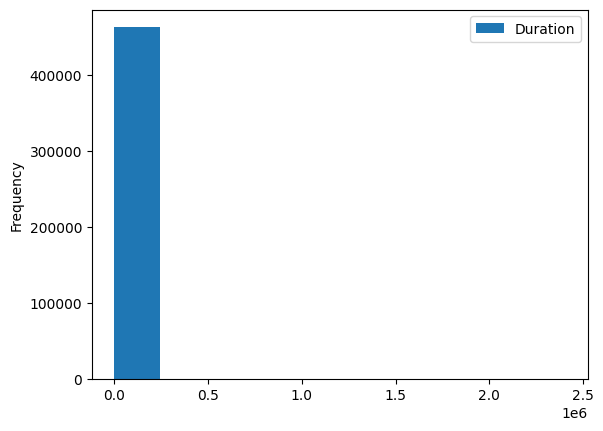

In [ ]:
# how to do a histogram of e.g. duration
# there is no graphical element of Spark (CHECK) so need to do locally
# we can use Python libs pandas & matplotlib

# import Python libs
import matplotlib.pyplot as plt
import pandas as pd

plot_pdf = cycle_df[["Duration"]].toPandas() # take just "Duration" col, convert to pandas dataframe structure ready to plot
#print("we have ", plot_df.count()," elements to plot")
print("we use '_pdf' to denote 'pandas data frame'")

plot_pdf.plot(kind="hist")
plt.show()

In [ ]:
#get a subset of the dataset containing dates for autumn
autumn_df = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load(['./10a*csv', './10b*csv', './11a*csv', './12a*csv', './13a*csv']))

In [ ]:
#check for null values
from pyspark.sql.functions import isnan, isnull
null_counts = autumn_df.agg(*(sum(isnull(c).cast("int")).alias(c) for c in autumn_df.columns))

In [ ]:
# see how many entries (rows) in data
numrows = autumn_df.count()
print("there are ",numrows," rows")

there are  2445464  rows


In [ ]:
#show the number of rows containing null values
null_counts.show()

+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+-------+-------+-------+
|Rental Id|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|    _c9|   _c10|   _c11|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+-------+-------+-------+
|   488627|  488627| 488627|  488627|       488653|         488653|    488627|         488627|           488627|2445464|2445464|2445464|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+-------+-------+-------+



In [ ]:
#drop the columns that are empty
autumn_df = autumn_df.drop('_c9', '_c10', '_c11')

In [ ]:
#drop rows containing null values
autumn_df = autumn_df.na.drop()

In [ ]:
#check again for null values
null_counts = autumn_df.agg(*(sum(isnull(c).cast("int")).alias(c) for c in autumn_df.columns))
null_counts.show()

+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|Rental Id|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|        0|       0|      0|       0|            0|              0|         0|              0|                0|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+



In [ ]:
#check for number of rows after dropping null values
numrows = autumn_df.count()
print("there are ",numrows," rows")

there are  1956811  rows


In [ ]:
#take a subset of the data containing dates for spring
spring_df = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load(['./3*csv', './4*csv', './5*csv', './6*csv']))

In [ ]:
#count the number of rows in the spring subset
numrows = spring_df.count()
print("there are ",numrows," rows")

there are  3146046  rows


In [ ]:
#check for null values
null_count = spring_df.agg(*(sum(isnull(c).cast("int")).alias(c) for c in spring_df.columns))

In [ ]:
#show the rows containing null values
null_count.show()

+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+-------+-------+-------+
|Rental Id|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|    _c9|   _c10|   _c11|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+-------+-------+-------+
|        0|       0|      0|       0|           28|             28|         0|              0|                0|3146046|3146046|3146046|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+-------+-------+-------+



In [ ]:
#drop the columns that are completely null
spring_df = spring_df.drop('_c9', '_c10', '_c11')

In [ ]:
#drop the rows containing null values
spring_df = spring_df.na.drop()

In [ ]:
#check again for null values
null_count = spring_df.agg(*(sum(isnull(c).cast("int")).alias(c) for c in spring_df.columns))
null_count.show()

+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|Rental Id|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|        0|       0|      0|       0|            0|              0|         0|              0|                0|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+



In [ ]:
#check for the number of rows in the spring subset after dropping null values
numrows = spring_df.count()
print("there are ",numrows," rows")

there are  3146018  rows


In [ ]:
autumn_df.show(10)

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 37875851|     120|   3229|28/09/2014 00:02|          450|Jubilee Street, S...|28/09/2014 00:00|            443|Philpot Street, W...|
| 37875861|    1080|   3283|28/09/2014 00:18|          645|Great Suffolk Str...|28/09/2014 00:00|             14|Belgrove Street ,...|
| 37875857|    2820|  11369|28/09/2014 00:47|          727|Chesilton Road, F...|28/09/2014 00:00|            321|Bermondsey Street...|
| 37875849|    1620|  11362|28/09/2014 00:27|          719|Victoria Park Roa...|28/09/2014 00:00|            773|Tallis Street, Te...|
| 37875847|     480|   7711|28/09/2014 00:08|          

In [ ]:
spring_df.show(10)

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 33253206|    1140|  11439|27/05/2014 00:59|          695|Islington Green, ...|27/05/2014 00:40|             81|Great Titchfield ...|
| 33345935|     660|  10792|30/05/2014 18:00|          326|Graham Street, Angel|30/05/2014 17:49|            203|West Smithfield R...|
| 33480171|    1440|  11901|03/06/2014 13:29|          695|Islington Green, ...|03/06/2014 13:05|            239|Warren Street Sta...|
| 33709780|     960|   6891|09/06/2014 18:31|           20|Drummond Street ,...|09/06/2014 18:15|            695|Islington Green, ...|
| 33794406|    1260|   6600|11/06/2014 19:58|          

In [ ]:
#get the summary statistics of the autumn subset
autumn_df.agg({"Duration": "min"}).show()
autumn_df.agg({"Duration": "mean"}).show()
autumn_df.agg({"Duration": "max"}).show()
autumn_df.agg({"Duration": "skewness"}).show()

+-------------+
|min(Duration)|
+-------------+
|        -1200|
+-------------+

+------------------+
|     avg(Duration)|
+------------------+
|1272.1295107192263|
+------------------+

+-------------+
|max(Duration)|
+-------------+
|        99900|
+-------------+

+------------------+
|skewness(Duration)|
+------------------+
| 91.42496894595844|
+------------------+



In [ ]:
#get the summary statistics of the spring subset
spring_df.agg({"Duration": "min"}).show()
spring_df.agg({"Duration": "mean"}).show()
spring_df.agg({"Duration": "max"}).show()
spring_df.agg({"Duration": "skewness"}).show()

+-------------+
|min(Duration)|
+-------------+
|            0|
+-------------+

+------------------+
|     avg(Duration)|
+------------------+
|1518.1006148089425|
+------------------+

+-------------+
|max(Duration)|
+-------------+
|        99900|
+-------------+

+------------------+
|skewness(Duration)|
+------------------+
| 81.83285242301945|
+------------------+



In [ ]:
numrows = autumn_df.count()
print("there are ",numrows," rows")

there are  1956811  rows


In [ ]:
numrows = spring_df.count()
print("there are ",numrows," rows")

there are  3146018  rows


In [ ]:
#convert the duration column to integer datatype
autumn_df =  autumn_df.withColumn("Duration", col("Duration"). cast("int"));


In [ ]:
#change the timestamp of the start date column
autumn_df = autumn_df.withColumn("Start Date", to_timestamp("Start Date", "dd/MM/yyyy HH:mm"))

In [ ]:
#change the timestamp of the end date column
autumn_df = autumn_df.withColumn("End Date", to_timestamp("End Date", "dd/MM/yyyy HH:mm"))

In [ ]:
#filter the autumn dataset with the concerned dates
autumn_df = autumn_df.select(
    "Rental Id", "Duration", "Bike Id", "Start Date", "StartStation Id", "StartStation Name", "End Date", "EndStation Id", 
    "EndStation Name").where(col("Start Date").between("2014-09-23 00:00:00", "2014-12-21 23:59:59")
    )

In [ ]:
#change the datatype of the duration column of the spring subset to integer
spring_df =  spring_df.withColumn("Duration", col("Duration"). cast("int"));

In [ ]:
#change the timestamp of the start date column
spring_df = spring_df.withColumn("Start Date", to_timestamp("Start Date", "dd/MM/yyyy HH:mm"))

In [ ]:
#change the timestamp of the end date column
spring_df = spring_df.withColumn("End Date", to_timestamp("End Date", "dd/MM/yyyy HH:mm"))

In [ ]:
#filter the spring subset according to date
spring_df = spring_df.select(
    "Rental Id", "Duration", "Bike Id", "Start Date", "StartStation Id", "StartStation Name", "End Date", "EndStation Id", 
    "EndStation Name").where(col("Start Date").between("2014-03-20 00:00:00", "2014-06-21 23:59:59")
    )

In [ ]:
#get the summary statistics of the cleaned autumn dataset
min_autumn = autumn_df.agg({"Duration": "min"}).first()[0]
mean_autumn = autumn_df.agg({"Duration": "mean"}).first()[0]
max_autumn = autumn_df.agg({"Duration": "max"}).first()[0]
skewness_autumn = autumn_df.agg({"Duration": "skewness"}).first()[0]
stddev_autumn = autumn_df.agg({"Duration": "stddev"}).first()[0]

print(min_autumn)
print(mean_autumn)
print(max_autumn)
print(skewness_autumn)
print(stddev_autumn)

-3360
1222.1108199997564
2460120
95.31719924925305
12966.923829957674


In [ ]:
#get the summary statistics for the spring dataset
min_spring = spring_df.agg({"Duration": "min"}).first()[0]
mean_spring = spring_df.agg({"Duration": "mean"}).first()[0]
max_spring = spring_df.agg({"Duration": "max"}).first()[0]
skewness_spring = spring_df.agg({"Duration": "skewness"}).first()[0]
stddev_spring = spring_df.agg({"Duration": "stddev"}).first()[0]

print(min_spring)
print(mean_spring)
print(max_spring)
print(skewness_spring)
print(stddev_spring)

0
1522.089246779652
2564700
82.8121752762892
12419.89754039535


In [ ]:
#select rows in autumn dataset which have a duration of less than zero
selected_row = autumn_df.filter(autumn_df.Duration < 0).count()
print(selected_row)

26


In [ ]:
#show selected rows
selected_row = autumn_df.filter(autumn_df.Duration < 0).show(26)
print(selected_row)

+---------+--------+-------+-------------------+---------------+--------------------+-------------------+-------------+--------------------+
|Rental Id|Duration|Bike Id|         Start Date|StartStation Id|   StartStation Name|           End Date|EndStation Id|     EndStation Name|
+---------+--------+-------+-------------------+---------------+--------------------+-------------------+-------------+--------------------+
| 38748858|   -2340|  11733|2014-10-26 01:40:00|             64|William IV Street...|2014-10-26 01:01:00|          489|Christian Street,...|
| 38748947|   -2820|  10942|2014-10-26 01:52:00|            755|   The Vale, Chelsea|2014-10-26 01:05:00|          291|Claverton Street,...|
| 38748893|   -2160|   9949|2014-10-26 01:44:00|             17|Hatton Wall, Holborn|2014-10-26 01:08:00|          470|   Mostyn Grove, Bow|
| 38748965|   -3360|   7268|2014-10-26 01:56:00|            239|Warren Street Sta...|2014-10-26 01:00:00|          540|Albany Street, Re...|
| 38748746|  

In [ ]:
#remove rows with duration less than 0
autumn_df = autumn_df.filter("Duration >= 0")

In [ ]:
selected_row = autumn_df.filter(autumn_df.Duration < 0).count()
print(selected_row)

0


In [ ]:
#Calculate the lower and upper bounds for the autumn dataset based on mean and standard deviation,
#calculate the lower bounds by subtracting 3 times the standard deviation from the mean
#calculate the upper bounds by adding 3 times the standard deviation to the mean
lower_bound_autumn = mean_autumn - 3 * stddev_autumn
upper_bound_autumn = mean_autumn + 3 * stddev_autumn

In [ ]:
#select the rows where the duration falls within the lower and upper bounds using the filter function
filtered_autumn = autumn_df.filter(col("Duration").between(lower_bound_autumn, upper_bound_autumn))

In [ ]:
#Calculate the lower and upper bounds for the spring dataset based on mean and standard deviation,
#calculate the lower bounds by subtracting 3 times the standard deviation from the mean
#calculate the upper bounds by adding 3 times the standard deviation to the mean
lower_bound_spring = mean_spring - 3 * stddev_spring
upper_bound_spring = mean_spring + 3 * stddev_spring

In [ ]:
#select the rows where the duration falls within the lower and upper bounds using the filter function
filtered_spring = spring_df.filter(col("Duration").between(lower_bound_spring, upper_bound_spring))

In [ ]:
#calculate the total duration of the bike rides in autumn
total_duration_autumn = filtered_autumn.select(sum("Duration")).first()[0]
print("Total duration of the bike rides dataset:", total_duration_autumn)

Total duration of the bike rides dataset: 1588750500


In [ ]:
#calculate the summary statistics after removing outliers, noise and missing values
min_autumn = filtered_autumn.agg({"Duration": "min"}).first()[0]
mean_autumn = filtered_autumn.agg({"Duration": "mean"}).first()[0]
max_autumn = filtered_autumn.agg({"Duration": "max"}).first()[0]
skewness_autumn = filtered_autumn.agg({"Duration": "skewness"}).first()[0]
stddev_autumn = filtered_autumn.agg({"Duration": "stddev"}).first()[0]

print(min_autumn)
print(mean_autumn)
print(max_autumn)
print(skewness_autumn)
print(stddev_autumn)

0
969.3656156133253
40080
12.148947869660937
1272.2124089099023


In [ ]:
#calculate the total duration of bike rides in spring
total_duration_spring = filtered_spring.select(sum("Duration")).first()[0]
print("Total duration of the bike rides dataset:", total_duration_spring)

Total duration of the bike rides dataset: 3267966120


In [ ]:
#calculate the summary statistics of the spring subset after removing noise, outliers and missing values
min_spring = filtered_spring.agg({"Duration": "min"}).first()[0]
mean_spring = filtered_spring.agg({"Duration": "mean"}).first()[0]
max_spring = filtered_spring.agg({"Duration": "max"}).first()[0]
skewness_spring = filtered_spring.agg({"Duration": "skewness"}).first()[0]
stddev_spring = filtered_spring.agg({"Duration": "stddev"}).first()[0]

print(min_spring)
print(mean_spring)
print(max_spring)
print(skewness_spring)
print(stddev_spring)

0
1216.7162914341243
38760
8.356229523987022
1687.6104225589493


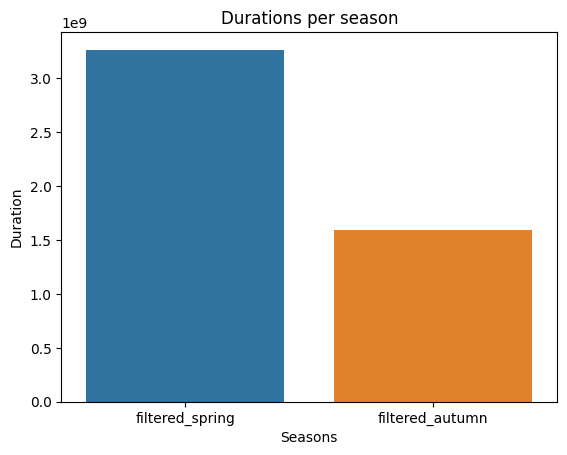

In [ ]:
#visualize the total duration of bike rides in autumn and spring
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = ['filtered_spring', 'filtered_autumn'], y = [total_duration_spring, total_duration_autumn])
plt.title('Durations per season')
plt.xlabel('Seasons')
plt.ylabel('Duration')
plt.show()


In [ ]:
spring_count = filtered_spring.count()
autumn_count = filtered_autumn.count()

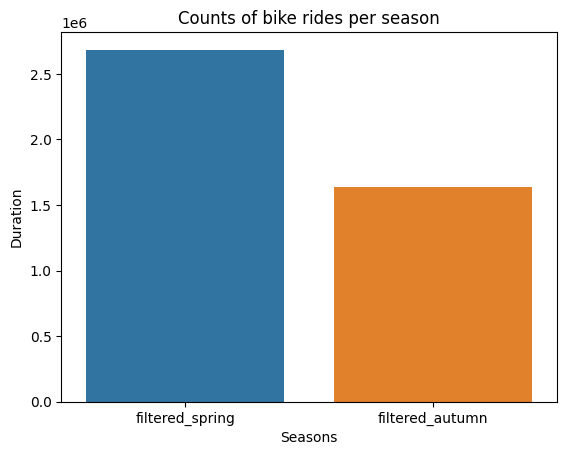

In [ ]:
#visualize the comparison between the count of bike rides in autumn and spring
sns.barplot(x = ['filtered_spring', 'filtered_autumn'], y = [spring_count, autumn_count])
plt.title('Counts of bike rides per season')
plt.xlabel('Seasons')
plt.ylabel('Duration')
plt.show()

In [ ]:
#Perform 2-sample t-test on the durations of autumn and spring rides
from scipy.stats import ttest_ind

#Extract the durations of autumn and spring rides into separate lists
autumn_duration = filtered_autumn.select("Duration").rdd.flatMap(lambda x: x).collect()
spring_duration = filtered_spring.select("Duration").rdd.flatMap(lambda x: x).collect()

#Perform the 2-sample t-test on the durations of spring and autumn
ttest_result = ttest_ind(autumn_duration, spring_duration, equal_var = False)

#Check if the p-value is less than 0.05 to determine the statistical significance
if ttest_result.pvalue < 0.05:
    print("The difference in mean durations between autumn and spring is statistically significant.")
else:
    print("The difference in mean durations between autumn and spring is not statistically significant.")
print("t-test result: ", ttest_result.statistic)
print("p-value: ", ttest_result.pvalue)

The difference in mean durations between autumn and spring is statistically significant.
t-test result:  -172.84580537126723
p-value:  0.0


In [ ]:
#concatenate the autumn and spring dataframes into a new dataframe called autumn_spring_df
autumn_spring_df = filtered_autumn.union(filtered_spring)
print("mix: ",autumn_spring_df.count())

mix:  4324849


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#import 2nd dataset
file2 = '/content/drive/MyDrive/03672099999.csv'
spark = SparkSession.builder.appName("bikes").getOrCreate()
weather_df = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load(file2))

In [ ]:
#count number of rows in dataset
numRows = weather_df.count()
print("there are ",numRows," rows")

In [ ]:
weather_df.show(10)

In [ ]:
#convert the Date column to a timestamp format
weather_df = weather_df.withColumn("DATE", to_timestamp("DATE", "dd/MM/yyyy HH:mm"))

In [ ]:
#check for null values
from pyspark.sql.functions import isnan, isnull
null_counts = weather_df.agg(*(sum(isnull(c).cast("int")).alias(c) for c in weather_df.columns))

In [ ]:
null_counts.show()

In [ ]:
#create an autumn subset by selecting columns of interest in autumn using dates as a filter
autumn_weather = weather_df.select(
    "DATE", "LATITUDE", "LONGITUDE", "ELEVATION", "NAME", "TEMP", "TEMP_ATTRIBUTES", "DEWP", "DEWP_ATTRIBUTES", "SLP", "SLP_ATTRIBUTES", "STP", 
    "STP_ATTRIBUTES", "VISIB", "VISIB_ATTRIBUTES", "WDSP", "WDSP_ATTRIBUTES", "MXSPD", "GUST",
    "MAX", "MAX_ATTRIBUTES", "PRCP", "PRCP_ATTRIBUTES", "SNDP", "FRSHTT").where(col("DATE").between("2014-09-23 00:00:00", "2014-12-21 23:59:59")
    )

In [ ]:
#count the number of rows in the autumn subset
numRows = autumn_weather.count()
print("there are ",numRows," rows")

In [ ]:
#create an spring subset by selecting columns of interest in autumn using dates as a filter
spring_weather = weather_df.select(
    "DATE", "LATITUDE", "LONGITUDE", "ELEVATION", "NAME", "TEMP", "TEMP_ATTRIBUTES", "DEWP", "DEWP_ATTRIBUTES", "SLP", "SLP_ATTRIBUTES", "STP", 
    "STP_ATTRIBUTES", "VISIB", "VISIB_ATTRIBUTES", "WDSP", "WDSP_ATTRIBUTES", "MXSPD", "GUST",
    "MAX", "MAX_ATTRIBUTES", "PRCP", "PRCP_ATTRIBUTES", "SNDP", "FRSHTT").where(col("DATE").between("2014-03-20 00:00:00", "2014-06-21 23:59:59")
    )

In [ ]:
#count the number of rows in the spring subset
numRows = spring_weather.count()
print("there are ",numRows," rows")

In [ ]:
#calculate the summary statistics of the temperature column in the autumn subset
min_autumn_weather = autumn_weather.agg({"TEMP": "min"}).first()[0]
mean_autumn_weather = autumn_weather.agg({"TEMP": "mean"}).first()[0]
max_autumn_weather = autumn_weather.agg({"TEMP": "max"}).first()[0]
skewness_autumn_weather = autumn_weather.agg({"TEMP": "skewness"}).first()[0]
stddev_autumn_weather = autumn_weather.agg({"TEMP": "stddev"}).first()[0]

print(min_autumn_weather)
print(mean_autumn_weather)
print(max_autumn_weather)
print(skewness_autumn_weather)
print(stddev_autumn_weather)

In [ ]:
#calculate the summary statistics of the temperature column in the spring subset
min_spring_weather = spring_weather.agg({"TEMP": "min"}).first()[0]
mean_spring_weather = spring_weather.agg({"TEMP": "mean"}).first()[0]
max_spring_weather = spring_weather.agg({"TEMP": "max"}).first()[0]
skewness_spring_weather = spring_weather.agg({"TEMP": "skewness"}).first()[0]
stddev_spring_weather = spring_weather.agg({"TEMP": "stddev"}).first()[0]

print(min_spring_weather)
print(mean_spring_weather)
print(max_spring_weather)
print(skewness_spring_weather)
print(stddev_spring_weather)

In [ ]:
total_autumn_temp = autumn_weather.select(mean("TEMP")).first()[0]

In [ ]:
total_spring_temp = spring_weather.select(mean("TEMP")).first()[0]

In [ ]:
#plot a barplot comparing the mean temperature of autumn and spring
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = ['autumn_temperature', 'spring_temperature'], y = [total_autumn_temp, total_spring_temp])
plt.title('Temperature per season')
plt.xlabel('Seasons')
plt.ylabel('Temperature')
plt.show()

In [ ]:
total_autumn_prcp = autumn_weather.select(mean("PRCP")).first()[0]

In [ ]:
total_spring_prcp = spring_weather.select(mean("PRCP")).first()[0]

In [ ]:
#plot a barplot comparing the mean precipitation of autumn and spring
sns.barplot(x = ['autumn_precipitation', 'spring_precipitation'], y = [total_autumn_prcp, total_spring_prcp])
plt.title('Precipitation per season')
plt.xlabel('Seasons')
plt.ylabel('Precipitation')
plt.show()

In [ ]:
total_autumn_wdsp = autumn_weather.select(mean("WDSP")).first()[0]

In [ ]:
total_spring_wdsp = spring_weather.select(mean("WDSP")).first()[0]

In [ ]:
#plot a barplot comparing the mean windspeed of autumn and spring
sns.barplot(x = ['autumn_windspeed', 'spring_windspeed'], y = [total_autumn_wdsp, total_spring_wdsp])
plt.title('Windspeed per season')
plt.xlabel('Windspeed')
plt.ylabel('Weather')
plt.show()

In [ ]:
total_autumn_visib = autumn_weather.select(mean("VISIB")).first()[0]

In [ ]:
total_spring_visib = spring_weather.select(mean("VISIB")).first()[0]

In [ ]:
#plot a barplot comparing the mean visibility of autumn and spring
sns.barplot(x = ['autumn_visibility', 'spring_visibility'], y = [total_autumn_visib, total_spring_visib])
plt.title('Visibility per season')
plt.xlabel('Seasons')
plt.ylabel('Visibility')
plt.show()

In [ ]:
#calculate the summary statistics for the precipitation column of the autumn subset
min_autumn_prcp = autumn_weather.agg({"PRCP": "min"}).first()[0]
mean_autumn_prcp = autumn_weather.agg({"PRCP": "mean"}).first()[0]
max_autumn_prcp = autumn_weather.agg({"PRCP": "max"}).first()[0]
skewness_autumn_prcp = autumn_weather.agg({"PRCP": "skewness"}).first()[0]
stddev_autumn_prcp = autumn_weather.agg({"PRCP": "stddev"}).first()[0]

print(min_autumn_prcp)
print(mean_autumn_prcp)
print(max_autumn_prcp)
print(skewness_autumn_prcp)
print(stddev_autumn_prcp)

In [ ]:
#calculate the summary statistics for the visibility column of the autumn subset
min_autumn_visib = autumn_weather.agg({"VISIB": "min"}).first()[0]
mean_autumn_visib = autumn_weather.agg({"VISIB": "mean"}).first()[0]
max_autumn_visib = autumn_weather.agg({"VISIB": "max"}).first()[0]
skewness_autumn_visib = autumn_weather.agg({"VISIB": "skewness"}).first()[0]
stddev_autumn_visib = autumn_weather.agg({"VISIB": "stddev"}).first()[0]

print(min_autumn_visib)
print(mean_autumn_visib)
print(max_autumn_visib)
print(skewness_autumn_visib)
print(stddev_autumn_visib)

In [ ]:
#calculate the summary statistics for the windspeed column of the autumn subset
min_autumn_wdsp = autumn_weather.agg({"WDSP": "min"}).first()[0]
mean_autumn_wdsp = autumn_weather.agg({"WDSP": "mean"}).first()[0]
max_autumn_wdsp = autumn_weather.agg({"WDSP": "max"}).first()[0]
skewness_autumn_wdsp = autumn_weather.agg({"WDSP": "skewness"}).first()[0]
stddev_autumn_wdsp = autumn_weather.agg({"WDSP": "stddev"}).first()[0]

print(min_autumn_wdsp)
print(mean_autumn_wdsp)
print(max_autumn_wdsp)
print(skewness_autumn_wdsp)
print(stddev_autumn_wdsp)

In [ ]:
#calculate the summary statistics for the precipitation column of the spring subset
min_spring_prcp = spring_weather.agg({"PRCP": "min"}).first()[0]
mean_spring_prcp = spring_weather.agg({"PRCP": "mean"}).first()[0]
max_spring_prcp = spring_weather.agg({"PRCP": "max"}).first()[0]
skewness_spring_prcp = spring_weather.agg({"PRCP": "skewness"}).first()[0]
stddev_spring_prcp = spring_weather.agg({"PRCP": "stddev"}).first()[0]

print(min_spring_prcp)
print(mean_spring_prcp)
print(max_spring_prcp)
print(skewness_spring_prcp)
print(stddev_spring_prcp)

In [ ]:
#calculate the summary statistics for the windspeed column of the spring subset
min_spring_wdsp = spring_weather.agg({"WDSP": "min"}).first()[0]
mean_spring_wdsp = spring_weather.agg({"WDSP": "mean"}).first()[0]
max_spring_wdsp = spring_weather.agg({"WDSP": "max"}).first()[0]
skewness_spring_wdsp = spring_weather.agg({"WDSP": "skewness"}).first()[0]
stddev_spring_wdsp = spring_weather.agg({"WDSP": "stddev"}).first()[0]

print(min_spring_wdsp)
print(mean_spring_wdsp)
print(max_spring_wdsp)
print(skewness_spring_wdsp)
print(stddev_spring_wdsp)

In [ ]:
#calculate the summary statistics for the visibility column of the spring subset
min_spring_visib = spring_weather.agg({"VISIB": "min"}).first()[0]
mean_spring_visib = spring_weather.agg({"VISIB": "mean"}).first()[0]
max_spring_visib = spring_weather.agg({"VISIB": "max"}).first()[0]
skewness_spring_visib = spring_weather.agg({"VISIB": "skewness"}).first()[0]
stddev_spring_visib = spring_weather.agg({"VISIB": "stddev"}).first()[0]

print(min_spring_visib)
print(mean_spring_visib)
print(max_spring_visib)
print(skewness_spring_visib)
print(stddev_spring_visib)

In [ ]:
#concatenate the autumn and spring subsets
autumn_spring_weather = autumn_weather.union(spring_weather)
print("mix: ",autumn_spring_weather.count())

In [ ]:
# Perform inner join on the 'end date' and 'date' columns
Joined_df = autumn_spring_df.join(autumn_spring_weather, autumn_spring_df['End Date'] == autumn_spring_weather['DATE'], 'inner')

# Show the result
Joined_df.show()

In [ ]:
numRows = Joined_df.count()
print("there are ",numRows," rows")

In [ ]:
# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = Joined_df.select("Duration", "TEMP").toPandas()

# Plotting the Duration against Precipitation
plt.scatter(pandas_df["TEMP"], pandas_df["Duration"])
plt.xlabel("Temperature")
plt.ylabel("Duration")
plt.title("Duration vs Temperature")
plt.show()

In [ ]:

# Convert the DataFrame columns to Pandas Series for plotting
temperature = Joined_df.select('PRCP').toPandas()['PRCP']
duration = Joined_df.select('Duration').toPandas()['Duration']

# Plotting the relationship between ride duration and temperature
plt.plot(temperature, duration, 'b-', label='Duration vs Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Duration')
plt.title('Relationship between Ride Duration and Precipitation')
plt.legend()
plt.show()

In [ ]:
# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = Joined_df.select("Duration", "PRCP").toPandas()

# Plotting the Duration against Precipitation
plt.scatter(pandas_df["PRCP"], pandas_df["Duration"])
plt.xlabel("Precipitation")
plt.ylabel("Duration")
plt.title("Duration vs Precipitation")
plt.show()

In [ ]:
# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = Joined_df.select("Duration", "WDSP").toPandas()

# Plotting the Duration against Precipitation
plt.scatter(pandas_df["WDSP"], pandas_df["Duration"])
plt.xlabel("Wind speed")
plt.ylabel("Duration")
plt.title("Duration vs Wind speed")
plt.show()

In [ ]:
# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = Joined_df.select("Duration", "VISIB").toPandas()

# Plotting the Duration against Precipitation
plt.scatter(pandas_df["VISIB"], pandas_df["Duration"])
plt.xlabel("Visibility")
plt.ylabel("Duration")
plt.title("Duration vs Visibility")
plt.show()

In [ ]:
from pyspark.sql.functions import corr
# Compute the correlation between ride duration and precipitation
correlation_precipitation = Joined_df.select(corr("Duration", "PRCP")).first()[0]

# Compute the correlation between ride duration and temperature
correlation_temperature = Joined_df.select(corr("Duration", "TEMP")).first()[0]

# Compute the correlation between ride duration and wind speed
correlation_wind_speed = Joined_df.select(corr("Duration", "WDSP")).first()[0]

# Compute the correlation between ride duration and wind speed
correlation_visibility = Joined_df.select(corr("Duration", "VISIB")).first()[0]

# Print the correlation coefficients
print("Correlation - Precipitation vs Duration:", correlation_precipitation)
print("Correlation - Temperature vs Duration:", correlation_temperature)
print("Correlation - Wind Speed vs Duration:", correlation_wind_speed)
print("Correlation - Visibility vs Duration:", correlation_visibility)